Import all libraries needed


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os

In [34]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string

In [35]:
VAD = pd.read_csv('VAD.txt',  names=["Valence", "Arousal", "Dominance"], sep='\t')
VAD.head(12)

,Valence,Arousal,Dominance
aaaaaaah,0.479,0.606,0.291
aaaah,0.520,0.636,0.282
aardvark,0.427,0.490,0.437
aback,0.385,0.407,0.288
abacus,0.510,0.276,0.485
abalone,0.500,0.480,0.412
abandon,0.052,0.519,0.245
abandoned,0.046,0.481,0.130
abandonment,0.128,0.430,0.202
abashed,0.177,0.644,0.307


In [36]:
english_stops = stopwords.words('english')
english_stops += list(string.punctuation)
english_stops += ['``', "''", "'s","...","'","--"]
english_stops += list(string.digits)

,Valence,Arousal,Dominance
0,0.625016,0.417004,0.508156
1,0.589138,0.418726,0.489208
2,0.611674,0.402348,0.501516
3,0.613676,0.429462,0.534838
4,0.595786,0.375172,0.477652
5,0.585550,0.411016,0.482456
6,0.577758,0.420006,0.486170
7,0.617552,0.416836,0.489134
8,0.578182,0.430974,0.502950
9,0.593636,0.413465,0.491399


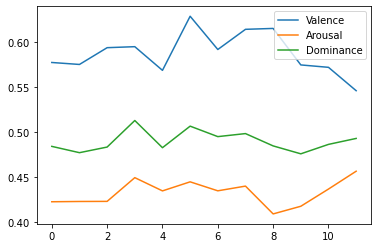

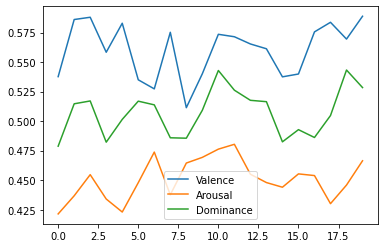

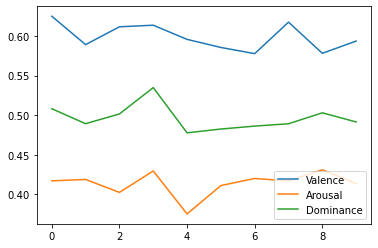

In [42]:


for root, dirs, files in os.walk('scripts/'):
    for file in files[:3]: 
        
        
        with open(os.path.join(root,file),'r',encoding="utf8") as f:
            
            Script = []
            Scriptdf = pd.DataFrame(columns = ['Valence',"Arousal","Dominance"])
            
            words = word_tokenize(f.read())
            words = [word.lower() for word in words]
            for word in words:
                if word not in english_stops: 
                    Script.append(word)
            c=0
            for word in Script:
   
                try:
                    
                    Scriptdf.loc[c] = VAD.loc[word]
                    c+=1
                except Exception:
                    pass
            Scriptdf = Scriptdf.groupby(np.arange(len(Scriptdf))//500).mean()
            Scriptdf.plot.line()
            
            plt.savefig(file+".jpg")       
Scriptdf

TEST

In [43]:
VAD.loc["weak"]

Valence      0.180
Arousal      0.241
Dominance    0.045
Name: weak, dtype: float64

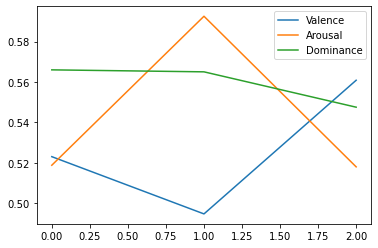

In [41]:
for root, dirs, files in os.walk('test/'):
    for file in files[:1]: 
        
        
        with open(os.path.join(root,file),'r',encoding="utf8") as f:
            
            Script = []
            Scriptdf = pd.DataFrame(columns = ['Valence',"Arousal","Dominance"])
            
            words = word_tokenize(f.read())
           
            words = [word.lower() for word in words]
            #words = [word.extract('([a-zA-Z\s]+)').strip() for word in words]
            #df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
            for word in words:
                if word not in english_stops:
                    Script.append(word)
                c=0
            for word in Script:
   
                try:
                    
                    Scriptdf.loc[c] = VAD.loc[word]
                    c+=1
                except Exception:
                    pass
            Scriptdf = Scriptdf.groupby(np.arange(len(Scriptdf))//100).mean()
            Scriptdf.plot.line()
            
            plt.savefig(file+".jpg") 

In [9]:
VAD.mean()

Valence      0.500015
Arousal      0.500002
Dominance    0.500208
dtype: float64

In [10]:
VAD

,Valence,Arousal,Dominance
aaaaaaah,0.479,0.606,0.291
aaaah,0.520,0.636,0.282
aardvark,0.427,0.490,0.437
aback,0.385,0.407,0.288
abacus,0.510,0.276,0.485
...,...,...,...
zoo,0.760,0.520,0.580
zoological,0.667,0.458,0.492
zoology,0.568,0.347,0.509
zoom,0.490,0.520,0.462


In [67]:
testdf.loc[4] = VAD.loc["available"]

In [68]:
testdf

,Valence,Arousal,Dominance
weak,0.180,0.241,0.045
0,0.180,0.241,0.045
1,0.180,0.241,0.045
strong,0.912,0.745,0.895
2,0.912,0.745,0.895
3,0.180,0.241,0.045
4,0.844,0.356,0.623


In [24]:
testdf = testdf.reset_index()

In [25]:
testdf

,index,Valence,Arousal,Dominance
0,aaaaaaah,0.479,0.606,0.291
1,aaaah,0.520,0.636,0.282
2,aardvark,0.427,0.490,0.437
3,aback,0.385,0.407,0.288
4,abacus,0.510,0.276,0.485
5,abalone,0.500,0.480,0.412
6,abandon,0.052,0.519,0.245
7,abandoned,0.046,0.481,0.130
8,abandonment,0.128,0.430,0.202
9,abashed,0.177,0.644,0.307


In [26]:
testdf = testdf.drop("index",axis=1)

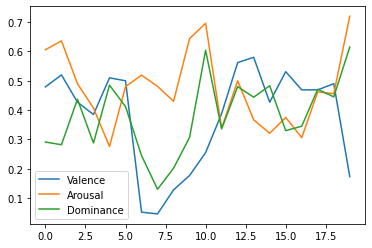

In [27]:
testdf.plot.line()

In [28]:
testdf = testdf.groupby(np.arange(len(testdf))//5).mean()

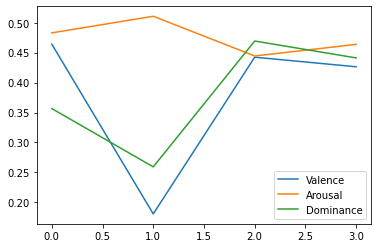

In [29]:
testdf.plot.line()